In [1]:
#Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Spotify Data.csv"
sdata = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = sdata.info()
df_head = sdata.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

(None,
                  track_id                 artists  \
 0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
 1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
 2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
 3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
 4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
 
                                           album_name  \
 0                                             Comedy   
 1                                   Ghost (Acoustic)   
 2                                     To Begin Again   
 3  Crazy Rich Asians (Original Motion Picture Sou...   
 4                                            Hold On   
 
                    track_name  popularity  duration_ms  explicit  \
 0                      Comedy          73       230666     False   
 1            Ghost - Acoustic          55       149610     False   
 2              To Begin Again          57       210826     False   
 3  Can't Help Falling In Love          71     

In [2]:
# 1. Standardizing simple text columns, not names (strip spaces, lowercase)
sdata['track_genre'] = sdata['track_genre'].str.strip().str.lower()

#2. Convert popularity to binary labels (1 = Popular, 0 = Not Popular)
sdata["popularity_label"] = (sdata["popularity"] > 80).astype(int)

#3 Handle missing values (drop rows with missing artist, album_name, or track_name)
sdata = sdata.dropna()

#4. Removing duplicates
sdata = sdata.drop_duplicates()

#5. Normalize loudness (since it's in negative decibels)
sdata["loudness"] = (sdata["loudness"] - sdata["loudness"].min()) / (sdata["loudness"].max() - sdata["loudness"].min())

#6. Normalize tempo
sdata["tempo"] = (sdata["tempo"] - sdata["tempo"].min()) / (sdata["tempo"].max() - sdata["tempo"].min())

#7. Removing duplicates
sdata_clean = sdata.drop_duplicates()

# 8. Confirming dataset cleanup
sdata_clean.info()
sdata_clean.head()



<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_label
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,0.361245,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,0.318397,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,0.313643,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,0.746758,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,0.492863,4,acoustic,1


In [3]:
# Features to analyze (song metadata that is universal)
features = ["danceability", "energy", "valence", "loudness", "acousticness", "tempo"]

# Finding Min and Max for each feature
high_low_values = {}
for feature in features:
    high_low_values[feature] = {
        "Minimum": sdata_clean[feature].min(),
        "Maximum": sdata_clean[feature].max()
    }

# Convert to DataFrame for better readability
high_low_df = pd.DataFrame(high_low_values)

# Display the results
print(high_low_df)


         danceability  energy  valence  loudness  acousticness  tempo
Minimum         0.000     0.0    0.000       0.0         0.000    0.0
Maximum         0.985     1.0    0.995       1.0         0.996    1.0


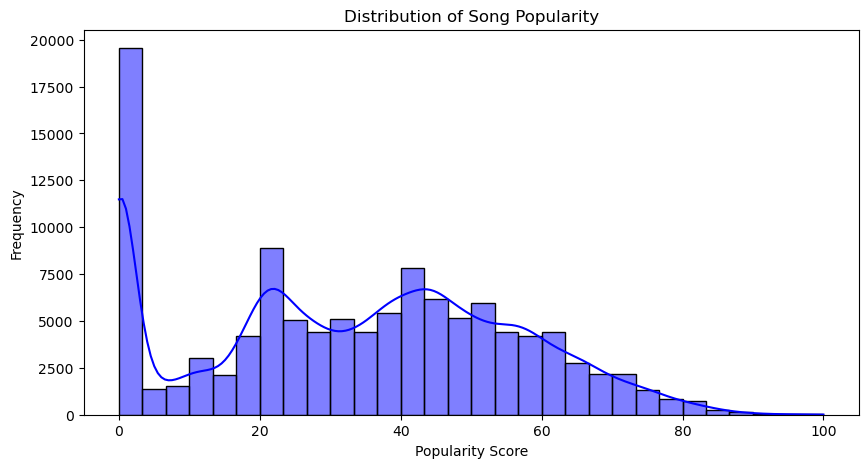

In [4]:
# Plot distribution of popularity scores to show how many are 
plt.figure(figsize=(10, 5))
sns.histplot(sdata_clean["popularity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

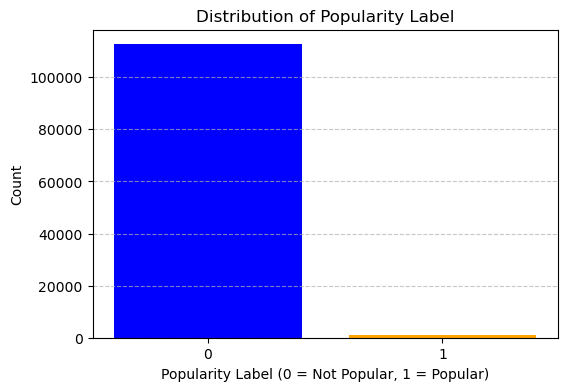

In [5]:
# Assuming 'popularity_code' is a binary variable (0 or 1)
if 'popularity_label' in sdata_clean.columns:
    # Count occurrences of each category (0 and 1)
    popularity_counts = sdata_clean['popularity_label'].value_counts()

    # Create bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(popularity_counts.index.astype(str), popularity_counts.values, color=['blue', 'orange'])
    plt.xlabel("Popularity Label (0 = Not Popular, 1 = Popular)")
    plt.ylabel("Count")
    plt.title("Distribution of Popularity Label")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'popularity_label' not found in the dataset. Please ensure it exists.")


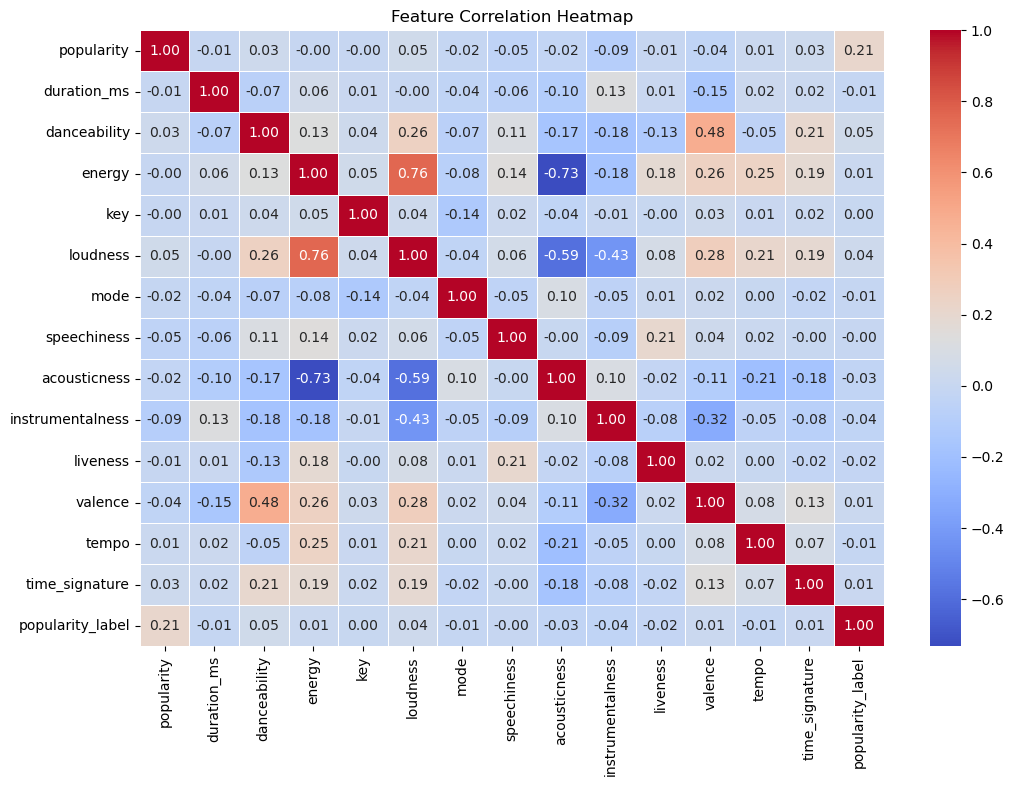

In [6]:
# Drop non-numeric columns
numeric_data = sdata_clean.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()